In [336]:
import re
import pandas as pd
import numpy as np
%matplotlib inline 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from textblob import TextBlob
from sklearn.cluster import KMeans
import sklearn.metrics as sm
from collections import Counter

In [337]:
data = pd.read_json('data.json')

In [338]:
df = pd.DataFrame(data)
pd.options.display.max_colwidth = 100

In [339]:
#Transforming columns into numerical features
df['no_of_photos'] = df['photos'].apply(len)
df['no_of_features'] = df['features'].apply(len)
df['interest_num'] = df['interest_level'].map({'low': 0, 'medium': 1, 'high': 2})
df["n_words"] = df["description"].apply(lambda x: len(x.split(" ")))
df["created"] = pd.to_datetime(df["created"])
df["created_year"] = df["created"].dt.year
df["created_month"] = df["created"].dt.month
df["created_day"] = df["created"].dt.day

In [352]:
df = df.reset_index()
df.head()


,level_0,index,bathrooms,bedrooms,building_id,created,description,display_address,features,interest_level,...,photos,price,street_address,no_of_photos,no_of_features,interest_num,n_words,created_year,created_month,created_day
0,0,10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy These Following Apartment Features As You Rent Her...,Metropolitan Avenue,[],medium,...,"[https://photos.renthop.com/2/7211212_1ed4542ec81621d70d1061aa833e669c.jpg, https://photos.renth...",3000,792 Metropolitan Avenue,5,0,1,95,2016,6,24
1,1,10000,1.0,2,c5c8a357cba207596b04d1afd1e4f130,2016-06-12 12:19:27,,Columbus Avenue,"[Doorman, Elevator, Fitness Center, Cats Allowed, Dogs Allowed]",low,...,"[https://photos.renthop.com/2/7150865_be3306c5d89c6bfa755c6e89c9ed64d5.jpg, https://photos.renth...",5465,808 Columbus Avenue,11,5,0,9,2016,6,12
2,2,100004,1.0,1,c3ba40552e2120b0acfc3cb5730bb2aa,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-war building with laundry in the basement and live ...",W 13 Street,"[Laundry In Building, Dishwasher, Hardwood Floors, Pets Allowed Case by Case]",high,...,"[https://photos.renthop.com/2/6887163_de85c427363a2e6d736a5df96d8d5541.jpg, https://photos.renth...",2850,241 W 13 Street,8,4,2,94,2016,4,17
3,3,100007,1.0,1,28d9ad350afeaab8027513a3e52ac8d5,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness room - laundry room -rooftop deck .<br /><br />Lo...,East 49th Street,"[Hardwood Floors, No Fee]",low,...,"[https://photos.renthop.com/2/6888711_6e660cee4f508b476568a4b4c1160c20.jpg, https://photos.renth...",3275,333 East 49th Street,3,2,0,80,2016,4,18
4,4,100013,1.0,4,0,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom apartment for rent. Available immediately. Elevat...,West 143rd Street,[Pre-War],low,...,"[https://photos.renthop.com/2/6934781_1fa4b41a929865b9a5443fdaf78d0147.jpg, https://photos.renth...",3350,500 West 143rd Street,3,1,0,68,2016,4,28


In [8]:
#Removing outliers from latitute and longitude as we got the scatter plot like this


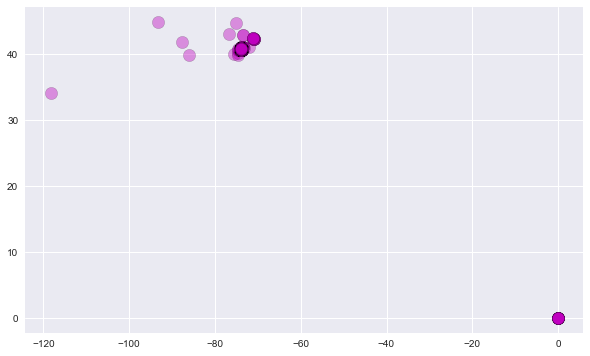

In [254]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
scatter = ax.scatter(df['longitude'], df['latitude'], c='m', edgecolor='k', alpha=.4, s=150)


In [255]:
plt.show(scatter)

In [11]:
# #Removing outliers from latitude and longitude using median and standard deviation

# x1 = df['latitude'].median()
# y1 = df['latitude'].std()

# x2 = df['longitude'].median()
# y2 = df['longitude'].std()

# for i in range(0,len(df)):
#     if (i>x1-2*y1):
#         df['latitude'] == i
#     else:
#         df['latitude'] == 0
        
# for i in range(0,len(df)):
#     if (i>x2 -2*y2):
#         df['longitude'] == i
#     else:
#         df['longitude'] == 0





In [256]:
x = df
latmean = x['latitude'].mean()

lonmean = x['longitude'].mean()

x=x.reset_index()

In [257]:
faa=[]
for i in range(0,len(x)):
    faa.append(np.sqrt(((x['latitude'][i] - latmean) * (x['latitude'][i] - latmean) ) + ((x['longitude'][i] - lonmean) * (x['longitude'][i] - lonmean)) ))

In [258]:
x['distance'] = faa

In [259]:
x = x[x['distance'] < 0.5] 


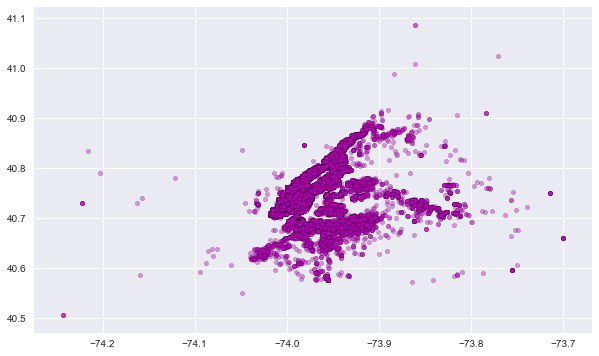

In [260]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
scatter = ax.scatter(x['longitude'], x['latitude'], c='m', edgecolor='k', alpha=.4, s=20)
plt.show()

In [262]:
# K Means Cluster
ncomp = 5
km = KMeans(ncomp, random_state=1)
km.fit(x['latitude'].reshape(-1,1))
x['labels'] = km.labels_


/Users/akshaygade/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  after removing the cwd from sys.path.


In [109]:
cols = sns.color_palette("RdBu", n_colors=ncomp, desat=.5)

In [110]:
X = x[['latitude','longitude']].values

In [111]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i+5, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

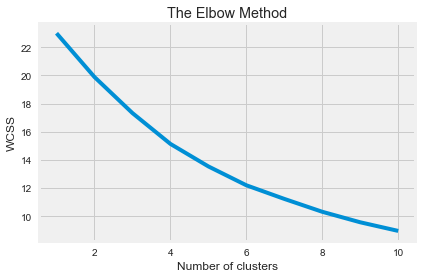

In [112]:
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [113]:
#Visualizing the clusters
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

In [114]:
y_kmeans

array([3, 1, 0, ..., 0, 0, 2], dtype=int32)

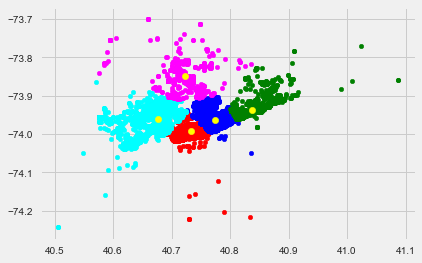

In [115]:
import matplotlib.style as style
style.use('fivethirtyeight')
fig.set_size_inches(10, 6)
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 20, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 20, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 20, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 20, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 20, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 40, c = 'yellow', label = 'Centroids')


# Text Analysis

In [341]:
features_list=df.features.tolist()
# features_list

In [342]:
words = str(features_list).split()

In [343]:
Counter = Counter(words)

In [351]:
most_occur = Counter.most_common(100)
most_occur[1:30]

[("'Laundry", 27147),
 ('in', 25659),
 ("'Hardwood", 21823),
 ("'Dogs", 21430),
 ("'Cats", 20296),
 ("'Elevator',", 20193),
 ("'Dishwasher',", 18552),
 ("Allowed'],", 17956),
 ("Floors',", 17230),
 ("'No", 17091),
 ("Building',", 16549),
 ("Center',", 13047),
 ("'Fitness", 12645),
 ("Fee',", 11560),
 ("'Doorman',", 11062),
 ("Unit',", 9730),
 ("['Doorman',", 9533),
 ("Fee'],", 7208),
 ("Deck',", 6510),
 ("Floors'],", 6303),
 ("'Outdoor", 5371),
 ("Room',", 5309),
 ("Space',", 5010),
 ("'Pre-War',", 4938),
 ("'High", 4865),
 ("['Roof", 4676),
 ("['Elevator',", 4479),
 ('Speed', 4303),
 ("Internet',", 4268)]

# Sentiment Analysis

In [547]:
#Tokenizing sentences usning nltk sent_tokenize

In [263]:
from nltk import sent_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
df['tokens'] = df['description'].apply(sent_tokenize)

/Users/akshaygade/anaconda3/lib/python3.6/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [264]:
def sentiment(words):
    polarity = SIA()
    output = []
    for word in words:
        out = polarity.polarity_scores(word)
        output.append(out)
    return pd.DataFrame(output).mean()

In [265]:
df2 = df['tokens'].apply(sentiment)

In [271]:
df2.head()

,compound,neg,neu,pos
0,0.117278,0.005222,0.912111,0.082667
1,NaN,NaN,NaN,NaN
2,0.571375,0.000000,0.798000,0.202000
3,0.305700,0.000000,0.948500,0.051500
4,0.097010,0.039400,0.887800,0.072800


In [272]:
sentiment_data = pd.concat([df2,df['interest_level']],axis=1)
sentiment_data.head()

,compound,neg,neu,pos,interest_level
0,0.117278,0.005222,0.912111,0.082667,medium
1,NaN,NaN,NaN,NaN,low
2,0.571375,0.000000,0.798000,0.202000,high
3,0.305700,0.000000,0.948500,0.051500,low
4,0.097010,0.039400,0.887800,0.072800,low


In [273]:
sns.set(style="darkgrid", palette="pastel", color_codes=True)

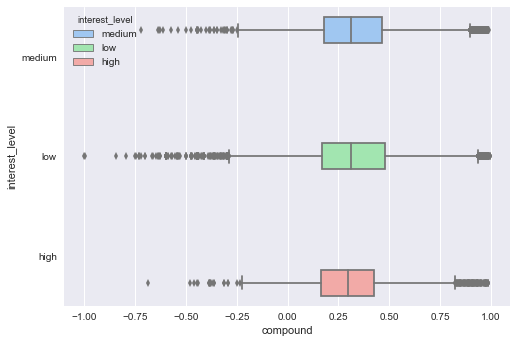

In [274]:
sns.boxplot(x="compound", y="interest_level", hue="interest_level", data=sentiment_data);


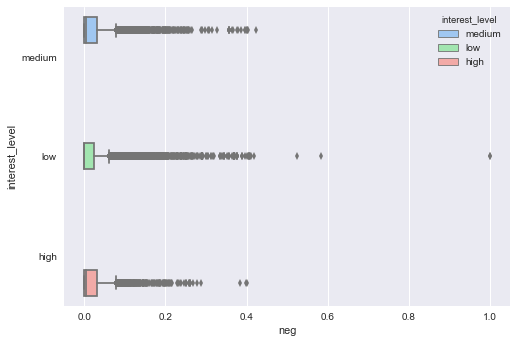

In [275]:
sns.boxplot(x="neg", y="interest_level", hue="interest_level", data=sentiment_data);

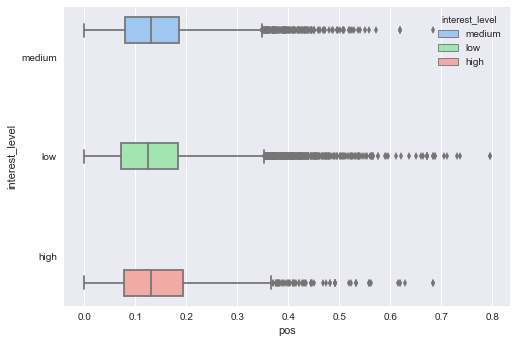

In [276]:
sns.boxplot(x="pos", y="interest_level", hue="interest_level", data=sentiment_data);

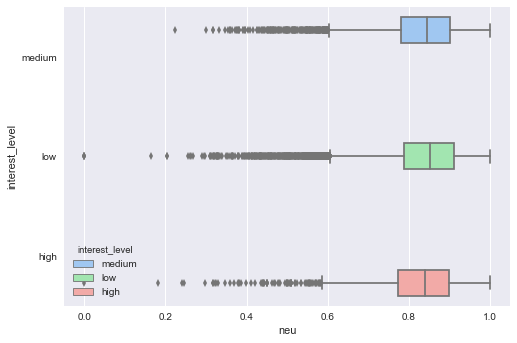

In [277]:
sns.boxplot(x="neu", y="interest_level", hue="interest_level", data=sentiment_data);

In [48]:
df.description.astype(str)
df["description"] = df["description"].replace('[^A-Za-z]+'," ",regex = True)
df.head()

,index,bathrooms,bedrooms,building_id,created,description,display_address,features,interest_level,latitude,...,photos,price,street_address,no_of_photos,no_of_features,interest_num,n_words,created_year,created_month,created_day
0,10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New Bedroom bath ApartmentEnjoy These Following Apartment Features As You Rent Here Mode...,Metropolitan Avenue,[],medium,40.7145,...,"[https://photos.renthop.com/2/7211212_1ed4542ec81621d70d1061aa833e669c.jpg, https://photos.renth...",3000,792 Metropolitan Avenue,5,0,1,95,2016,6,24
1,10000,1.0,2,c5c8a357cba207596b04d1afd1e4f130,2016-06-12 12:19:27,,Columbus Avenue,"[Doorman, Elevator, Fitness Center, Cats Allowed, Dogs Allowed]",low,40.7947,...,"[https://photos.renthop.com/2/7150865_be3306c5d89c6bfa755c6e89c9ed64d5.jpg, https://photos.renth...",5465,808 Columbus Avenue,11,5,0,9,2016,6,12
2,100004,1.0,1,c3ba40552e2120b0acfc3cb5730bb2aa,2016-04-17 03:26:41,Top Top West Village location beautiful Pre war building with laundry in the basement and live i...,W 13 Street,"[Laundry In Building, Dishwasher, Hardwood Floors, Pets Allowed Case by Case]",high,40.7388,...,"[https://photos.renthop.com/2/6887163_de85c427363a2e6d736a5df96d8d5541.jpg, https://photos.renth...",2850,241 W 13 Street,8,4,2,94,2016,4,17
3,100007,1.0,1,28d9ad350afeaab8027513a3e52ac8d5,2016-04-18 02:22:02,Building Amenities Garage Garden fitness room laundry room rooftop deck br br Located in midtown...,East 49th Street,"[Hardwood Floors, No Fee]",low,40.7539,...,"[https://photos.renthop.com/2/6888711_6e660cee4f508b476568a4b4c1160c20.jpg, https://photos.renth...",3275,333 East 49th Street,3,2,0,80,2016,4,18
4,100013,1.0,4,0,2016-04-28 01:32:41,Beautifully renovated bedroom flex bedroom apartment for rent Available immediately Elevator bui...,West 143rd Street,[Pre-War],low,40.8241,...,"[https://photos.renthop.com/2/6934781_1fa4b41a929865b9a5443fdaf78d0147.jpg, https://photos.renth...",3350,500 West 143rd Street,3,1,0,68,2016,4,28


In [49]:
#TF IDF

In [278]:
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
stemmer = SnowballStemmer("english")


In [279]:
def tokens(x):
    x = x.split()
    stems = []
    [stems.append(stemmer.stem(word)) for word in x]
    return stems


In [283]:
vect = TfidfVectorizer(tokenizer = tokens, stop_words = 'english', ngram_range=(1, 1), min_df = 0.01,lowercase = False)
%time bow = vect.fit_transform(df["description"])


CPU times: user 1min 10s, sys: 743 ms, total: 1min 10s
Wall time: 1min 12s


/Users/akshaygade/anaconda3/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


In [330]:
matdf = pd.DataFrame(bow.toarray())
matdf.columns = vect.get_feature_names()
matdf.head(10)

,!,"""",&,&amp;,*,**,+,",",-,--,...,wood,work,world,www.mironproperties.com<p><a,year,yoga,york,you'll,you'r,you.
0,0.0,0.0,0.093985,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.114289,0.0,0.0,0.0
3,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.665363,0.0,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.143779,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
5,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
6,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.151393,0.0,...,0.000000,0.224629,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
7,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
8,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
9,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,0.0,0.137706,0.0,0.0,0.000000,0.0,0.0,0.0


# MACHINE LEARNING


In [301]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss

In [313]:
X = df[['bathrooms','bedrooms','price','no_of_photos','no_of_features','n_words','latitude','longitude']]
y = df.interest_num


In [314]:
#Train Test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.4,random_state=42)


In [315]:
#Normalizing the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_val = sc.transform(X_val)

# RIDGE CLASSIFIER

In [316]:
from sklearn.linear_model import RidgeClassifier


In [317]:
rdg_clf = RidgeClassifier(alpha=1.0, fit_intercept=True, normalize=False,solver='auto',max_iter=100)


In [318]:
rdg_clf.fit(X_train,y_train)


RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
        max_iter=100, normalize=False, random_state=None, solver='auto',
        tol=0.001)

In [319]:
pred = rdg_clf.predict(X_val)


In [320]:
accuracy_score(y_val,pred)


0.6907451496884657

# Multi Layer Perceptron

In [121]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(150,150,150))
mlp.fit(X_train,y_train)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(150, 150, 150), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [53]:
pred = mlp.predict(X_val)

In [50]:
fpr, tpr, threshold = metrics.roc_curve(y_val, pred,pos_label=1)
roc_auc = metrics.auc(fpr, tpr)


In [55]:
accuracy_score(y_val,pred)


0.7030933405376198

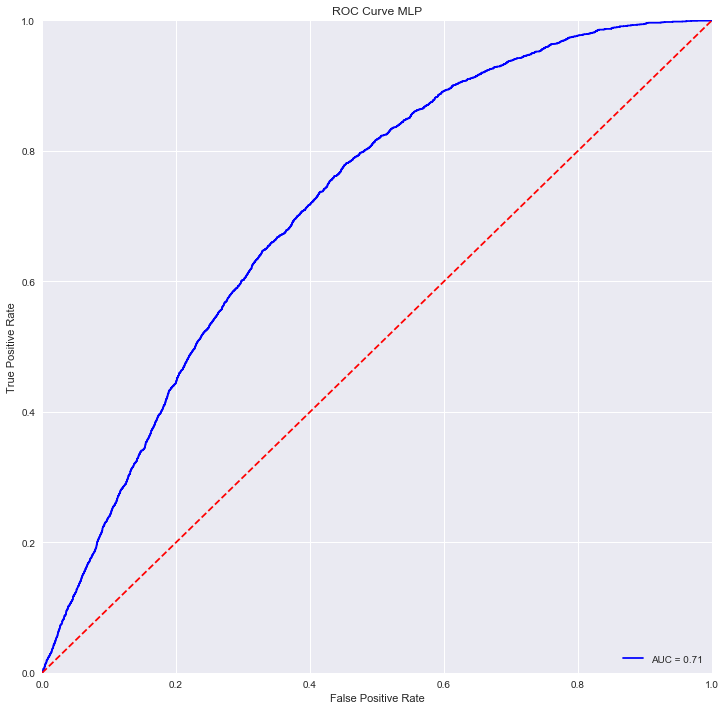

In [52]:
plt.title('ROC Curve MLP')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.rcParams['figure.figsize'] = 12,12
plt.show()

# Random Forrest


In [323]:
clf = RandomForestClassifier(n_estimators=50,n_jobs=-1,min_samples_leaf=5)
%time clf.fit(X_train, y_train)
y_val_pred = clf.predict(X_val)
accuracy_score(y_val,y_val_pred)


CPU times: user 2.24 s, sys: 76.9 ms, total: 2.32 s
Wall time: 893 ms


0.7221518666734208

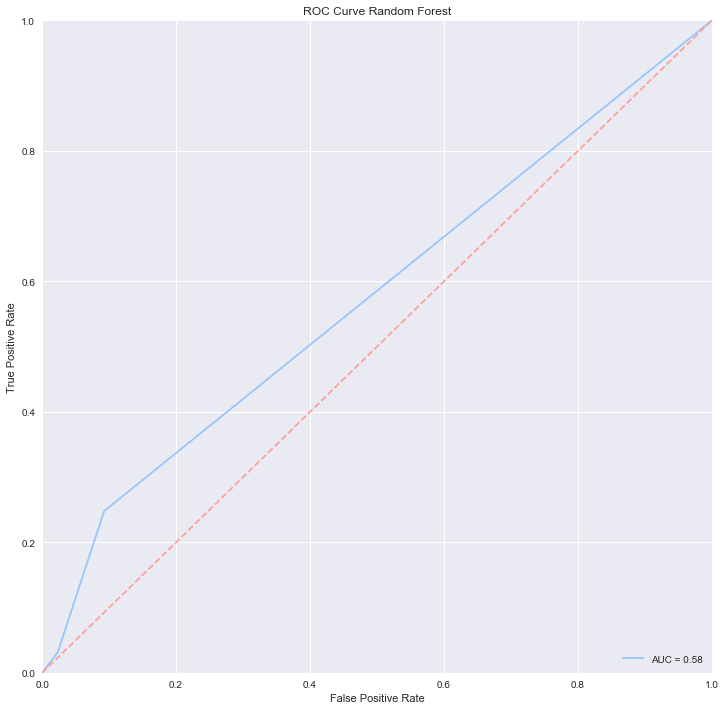

In [324]:
fpr, tpr, threshold = metrics.roc_curve(y_val, y_val_pred,pos_label=1)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC Curve Random Forest')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.rcParams['figure.figsize'] = 12,12
plt.show()

In [141]:
pd.crosstab(pd.Series(y_val,name="Actual"),pd.Series(y_val_pred,name="Predicted"),margins=True)

Predicted,0.0,1.0,2.0,All
Actual,,,,
0.0,2682,364,73,3119
1.0,865,131,26,1022
2.0,293,38,6,337
All,3840,533,105,4478


# SVM


In [208]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set resu
y_pred = classifier.predict(X_val)


In [209]:
print(accuracy_score(y_val, y_pred))

0.6883801033329956


# ARTIFICIAL NEURAL NETWORK

In [228]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier


/Users/akshaygade/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [229]:
#Initialize neural network
classifier = Sequential()

In [234]:
def build_classifier(optimizer):
    classifier = Sequential()
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 8))
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier
classifier = KerasClassifier(build_fn = build_classifier)
parameters = {'batch_size': [1],
              'epochs': [5],
              'optimizer': ['adam', 'rmsprop']}
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5)
grid_search = grid_search.fit(X_train, y_train)


Epoch 1/5
31584/31584 [==============================] - 100s 3ms/step - loss: 0.5768 - acc: 0.6629
Epoch 2/5
31584/31584 [==============================] - 105s 3ms/step - loss: 0.5327 - acc: 0.6477
Epoch 3/5
31584/31584 [==============================] - 105s 3ms/step - loss: 0.5193 - acc: 0.6563
Epoch 4/5
31584/31584 [==============================] - 115s 4ms/step - loss: 0.5030 - acc: 0.6516
Epoch 5/5
31584/31584 [==============================] - 108s 3ms/step - loss: 0.4949 - acc: 0.6519
Epoch 1/5
31585/31585 [==============================] - 110s 3ms/step - loss: 0.5840 - acc: 0.6606
Epoch 2/5
31585/31585 [==============================] - 99s 3ms/step - loss: 0.5391 - acc: 0.6437
Epoch 3/5
31585/31585 [==============================] - 107s 3ms/step - loss: 0.5310 - acc: 0.6438
Epoch 4/5
31585/31585 [==============================] - 104s 3ms/step - loss: 0.5295 - acc: 0.6429
Epoch 5/5
31585/31585 [==============================] - 107s 3ms/step - loss: 0.5262 - acc: 0.6470
E

In [235]:
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_


In [237]:
best_parameters

{'batch_size': 1, 'epochs': 5, 'optimizer': 'adam'}

In [236]:
best_accuracy

0.654213419112991

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# KNN

In [212]:
KNN_grid = [{'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17], 'weights': ['uniform', 'distance']}]

    # build a grid search to find the best parameters
gridsearchKNN = GridSearchCV(KNeighborsClassifier(), KNN_grid, cv=5)

    # run the grid search
gridsearchKNN.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17], 'weights': ['uniform', 'distance']}],
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [213]:
pred=gridsearchKNN.predict(X_val)

In [215]:
print(accuracy_score(y_val, pred))

0.6805794752304731


In [216]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_val, pred)

array([[6241,  499,   55],
       [1806,  409,   96],
       [ 556,  141,   68]])

In [218]:
from sklearn import metrics
fpr, tpr, threshold = metrics.roc_curve(y_val, pred,pos_label=1)
roc_auc = metrics.auc(fpr, tpr)


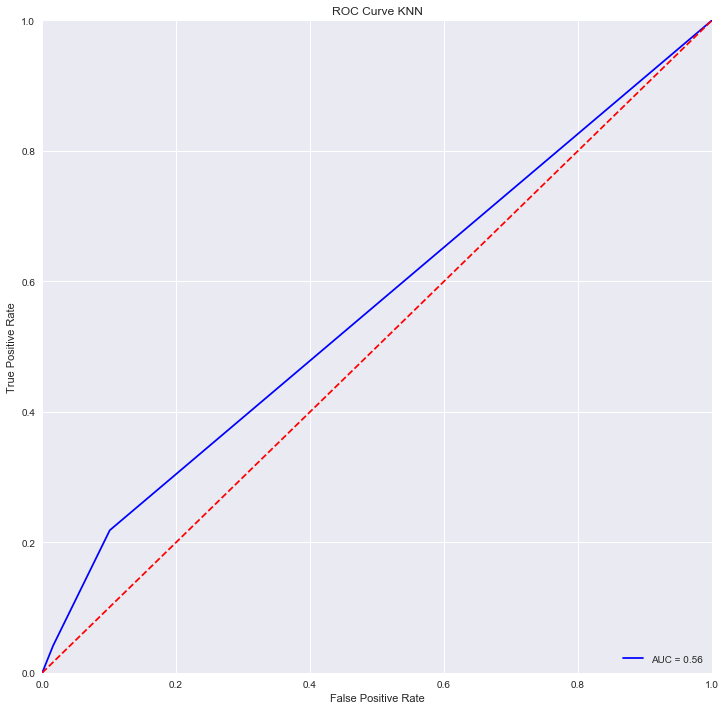

In [219]:
import matplotlib.pyplot as plt
plt.title('ROC Curve KNN')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.rcParams['figure.figsize'] = 12,12
plt.show()

# Decision Tree

In [220]:
DT_grid = [{'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 'criterion': ['gini', 'entropy']}]

# build a grid search to find the best parameters
gridsearchDT = GridSearchCV(DecisionTreeClassifier(), DT_grid, cv=5)

# run the grid search
gridsearchDT.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 'criterion': ['gini', 'entropy']}],
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [221]:
pred=gridsearchDT.predict(X_val)

In [222]:
print(accuracy_score(y_val, pred))
from sklearn.metrics import confusion_matrix
confusion_matrix(y_val, pred)

0.7017526086516057


array([[6487,  283,   25],
       [1930,  335,   46],
       [ 455,  205,  105]])

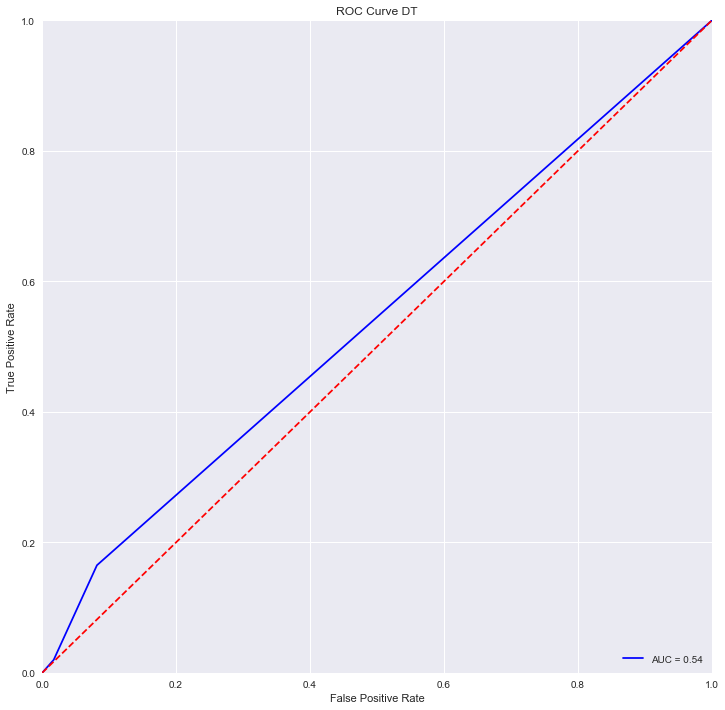

In [224]:
fpr, tpr, threshold = metrics.roc_curve(y_val, pred,pos_label=1)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC Curve DT')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.rcParams['figure.figsize'] = 12,12
plt.show()


# Logistic Regression

In [325]:
LREG_grid = [{'C': [0.5, 1, 1.5, 2], 'penalty': ['l1', 'l2']}]
gridsearchLREG = GridSearchCV(LogisticRegression(), LREG_grid, cv=5)
gridsearchLREG.fit(X_train, y_train)
pred=gridsearchLREG.predict(X_val)



In [329]:
print(accuracy_score(y_val, pred))


0.6904412137176434
